# Image Processing (Session II)

In [2]:
#Read the image
from skimage import io
img = io.imread("/Users/annicenajafi/Desktop/almond.jpg", as_gray=True)

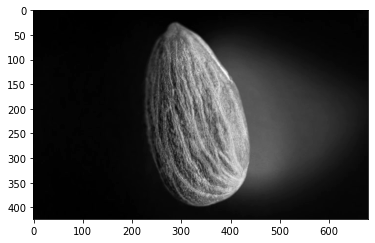

In [3]:
#Display the image
import matplotlib.pyplot as plt
plt.imshow(img, plt.cm.binary)

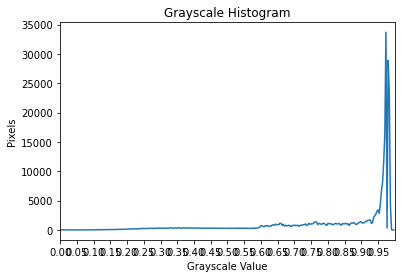

In [4]:
#Display the histogram
import numpy as np
histogram, bin_edges = np.histogram(img, bins=300, range = (0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixels")
plt.xlim([0, 1])
plt.xticks(np.arange(0, 1, 0.05))
plt.plot(bin_edges[0:-1], histogram)

In [5]:
#thresholding
binary_img = img<0.5

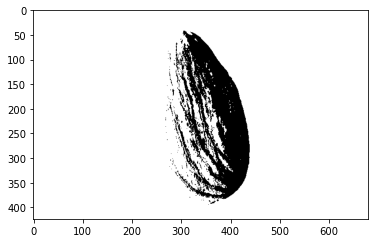

In [6]:
plt.imshow(binary_img, plt.cm.binary)

In [7]:
#import skimage.morphology as morph
#Remove small holes from your image / Not doing this here
#removed_holes_img = morph.remove_small_holes(binary_img, 600)
#removed_small_holes_img = morph.remove_small_holes(removed_holes_img, 1000)

In [8]:
#plt.imshow(removed_holes_img, plt.cm.binary)

<h3>Use Dilation to Get Rid of the holes in the Border</h3>

<img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Grayscale_Morphological_Dilation.gif" height=400, width=400; alt="dilation">

Note: In our image the white pixels have a lower value equal to 0 and the black part is 1 so it will try to take the most black pixel in each window

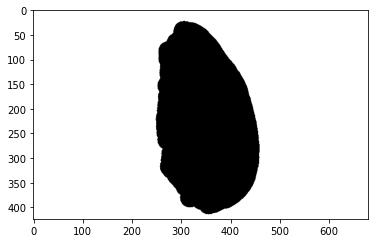

In [9]:
#Instead use dilation to get rid of the inconsistency in the border
from skimage.morphology import dilation
from skimage.morphology import disk 
selem = disk(20)
dilated_img = dilation(binary_img, selem)
plt.imshow(dilated_img, plt.cm.binary)

In [10]:
#For the purpose of checking values
'''
from skimage.util import img_as_float64, img_as_bool
img_as_float64(binary_img)
'''

'\nfrom skimage.util import img_as_float64, img_as_bool\nimg_as_float64(binary_img)\n'

<h3>Find the Perimeter</h3>

In [11]:
from skimage import measure
measure.perimeter(dilated_img, neighbourhood=4) 

1056.3300858899106

<h3>Get the Properties of the Image</h3>

In [12]:
#get the label of the image
img_label = measure.label(dilated_img)

In [13]:
#Measure region properties
from skimage import measure
regions = measure.regionprops(img_label)

In [29]:
type(regions[0])

skimage.measure._regionprops.RegionProperties

In [27]:
measure.regionprops?

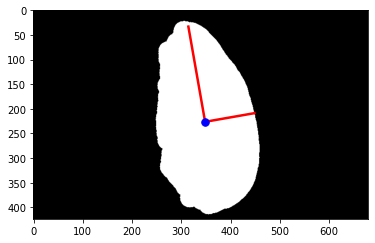

In [428]:
import math as math
#First plot our binary image
fig, ax = plt.subplots()
ax.imshow(dilated_img, cmap=plt.cm.gray)
#Iterate through the regions
for region in regions:
    #if props.area >= 100:
        y0, x0 = region.centroid
        orientation = region.orientation
        x1 = x0 + math.cos(orientation) * 0.5 * region.minor_axis_length
        y1 = y0 - math.sin(orientation) * 0.5 * region.minor_axis_length
        x2 = x0 - math.sin(orientation) * 0.5 * region.major_axis_length
        y2 = y0 - math.cos(orientation) * 0.5 * region.major_axis_length

        ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
        ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
        ax.plot(x0, y0, '.b', markersize=15)

        minr, minc, maxr, maxc = region.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        #ax.plot(bx, by, '-b', linewidth=2.5)


#ax.axis((0, 600, 600, 0))
plt.show()

<h3>Find the angle between the x axis and the major axis</h3>

In [429]:
orientation = orientation*180/np.pi

In [430]:
orientation

9.964348907621032

In [466]:
region.area

62082

<h3>Rotate the Image</h3>

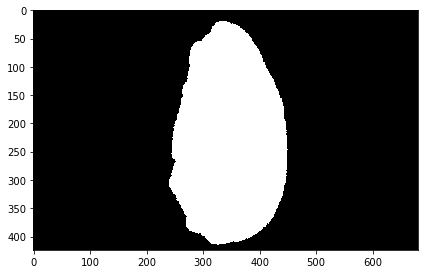

In [431]:
dilated_img = rotate(dilated_img, -orientation)

from skimage.io import imshow, show

imshow(dilated_img)

In [432]:
from skimage.util import img_as_float64, img_as_bool
dilated_img = img_as_float64(dilated_img)
dilated_img = img_as_bool(dilated_img)

<h3>Test symmetry using Union and Intersection</h3>

In [433]:
import numpy as np

def TestOverlap(img_1, img_2):
    '''
    params: img_1, img_2 (Two images)
    returns the number of overlapping pixels from the two images with respect to the size of the image
    '''
    intersection = np.bitwise_and(img_1,img_2)

    union = np.bitwise_or(img_1, img_2)

    res = np.count_nonzero(intersection)/np.count_nonzero(union)
    return res

<h3>Divide the Image into Left and Right Halves</h3>

In [434]:
height, width = dilated_img.shape
height_center, width_center = height//2, width//2

In [435]:
# Test left-right symmetry
if(width == 2*width_center):
    left  = dilated_img[:, :width_center]
    right = dilated_img[:, width_center:]
else:
    left  = dilated_img[:, :width_center]
    right = dilated_img[:, (width_center+1):]
#Test Using Function define above
left_right_sym = TestOverlap(left, np.flip(right, axis=1))

In [436]:
# Test top and botton symmetry
if(height == 2*height_center):
    top = dilated_img[:height_center, :]
    bottom = dilated_img[height_center:, :]
else:
    top = dilated_img[:height_center, :]
    bottom = dilated_img[(height_center+1):, :]
#Test Using Function define above
top_bottom_sym = TestOverlap(top, np.flip(bottom, axis=0))

In [437]:
print(f'The Left-right symmetry score is {int(left_right_sym*100)} and the top-bottom symmetry score is {int(top_bottom_sym*100)}')

The Left-right symmetry score is 86 and the top-bottom symmetry score is 76


Convert to Float again

In [438]:
dilated_img = img_as_float64(dilated_img)

In [439]:
dilated_img.shape

(424, 680)

<h3>Project to X-axis and Y-axis</h3>

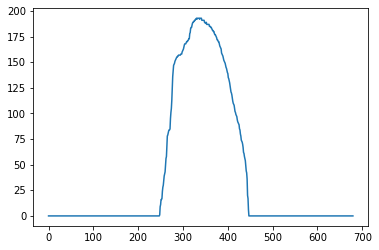

In [453]:
plt.plot(np.arange(0, len(np.sum(top, axis=0)), 1), np.sum(top, axis=0).tolist())

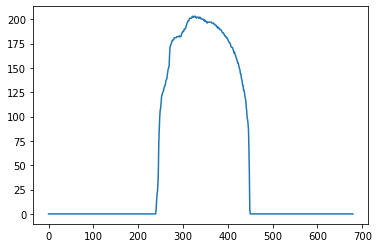

In [454]:
plt.plot(np.arange(0, len(np.sum(bottom, axis=0)), 1), np.sum(bottom, axis=0).tolist())

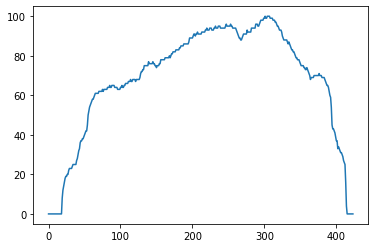

In [455]:
plt.plot(np.arange(0, len(np.sum(left, axis=1)), 1), np.sum(left, axis=1).tolist())

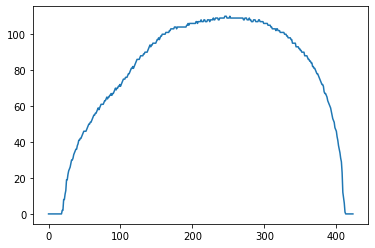

In [456]:
plt.plot(np.arange(0, len(np.sum(right, axis=1)), 1), np.sum(right, axis=1).tolist())

In [25]:
np.correlate(np.sum(bottom, axis=0), np.sum(top, axis=0))[0][1]

NameError: name 'bottom' is not defined

In [445]:
np.corrcoef(np.sum(left, axis=1), np.sum(right, axis=1))[]

array([[1.        , 0.98188852],
       [0.98188852, 1.        ]])

In [458]:
import scipy
scipy.stats.pearsonr(np.sum(left, axis=1), np.sum(right, axis=1))

(0.9818885203988034, 5.115894347087077e-307)